In [ ]:
# Notebook criado para o desenvolvimento de gráficos do ativo
#
# Objetivo: Conexao com o MetaTrader 5, e criar gráficos para qualquer ativo
#           para o desenvolvimento de estratégias de trading.

In [1]:
# Lendo as bibliotecas necessarias
import MetaTrader5 as mt5
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [36]:
# Conectando ao MetaTrader 5
# Utilizando os logins atuais do Software
if not mt5.initialize():
    print("initialize() falhou")
    mt5.shutdown()
# Consultamos o estado e os parâmetros de conexão
print(mt5.terminal_info())
# Obtemos informações sobre a versão do MetaTrader 5
print(mt5.version())

TerminalInfo(community_account=False, community_connection=False, connected=True, dlls_allowed=True, trade_allowed=False, tradeapi_disabled=False, email_enabled=False, ftp_enabled=False, notifications_enabled=True, mqid=True, build=3302, maxbars=100000, codepage=1252, ping_last=230443, community_balance=0.0, retransmission=0.0, company='MetaQuotes Software Corp.', name='MetaTrader 5', language='Portuguese (Brazil)', path='C:\\Program Files\\MetaTrader 5', ...)
(500, 3302, '24 May 2022')


In [37]:
# Simbolo selecionado para grafico
simbolo = "EURUSD" #"PETR3"

In [38]:
# Obtendo as informacoes do ativo de tamanho 1000, considerando a data de hoje e o Timframe de H1 = 1 hora;
ValoresAtivo = mt5.copy_rates_from_pos(simbolo, mt5.TIMEFRAME_H1, 0, 1000)
ValoresAtivo_PD = pd.DataFrame(ValoresAtivo) # Conversao em pandas

In [39]:
# Verificando os dados
ValoresAtivo_PD.head()

,time,open,high,low,close,tick_volume,spread,real_volume
0,1648465200,1.09901,1.09911,1.09695,1.09790,6625,5,0
1,1648468800,1.09792,1.09901,1.09741,1.09879,3822,5,0
2,1648472400,1.09881,1.09929,1.09586,1.09631,3988,5,0
3,1648476000,1.09630,1.09698,1.09506,1.09560,6212,5,0
4,1648479600,1.09559,1.09721,1.09460,1.09681,6786,5,0
...,...,...,...,...,...,...,...,...
995,1653429600,1.07299,1.07380,1.07299,1.07345,782,5,0
996,1653433200,1.07342,1.07356,1.07229,1.07317,269,5,0
997,1653436800,1.07306,1.07387,1.07302,1.07378,873,5,0
998,1653440400,1.07383,1.07383,1.07318,1.07325,797,5,0


In [40]:
ValoresAtivo_PD['time'] = pd.to_datetime(ValoresAtivo_PD['time'], unit='s')

In [41]:
# Verificando um o tail() dos valores
ValoresAtivo_PD.tail()

,time,open,high,low,close,tick_volume,spread,real_volume
995,2022-05-24 22:00:00,1.07299,1.07380,1.07299,1.07345,782,5,0
996,2022-05-24 23:00:00,1.07342,1.07356,1.07229,1.07317,269,5,0
997,2022-05-25 00:00:00,1.07306,1.07387,1.07302,1.07378,873,5,0
998,2022-05-25 01:00:00,1.07383,1.07383,1.07318,1.07325,797,5,0
999,2022-05-25 02:00:00,1.07325,1.07363,1.07275,1.07282,452,5,0


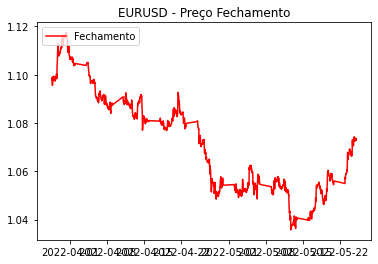

In [44]:
# Gerando o gráfico
plt.plot(ValoresAtivo_PD['time'], ValoresAtivo_PD['close'], 'r-', label='Fechamento')
 
# exibimos rótulos
plt.legend(loc='upper left')
 
# adicionamos cabeçalho
plt.title(simbolo + ' - Preço Fechamento')
 
# mostramos o gráfico
plt.show()

In [45]:
# Solicitando os Ticks diario do "simbolo"
ValoresAtivosTicks = mt5.copy_ticks_from(simbolo, datetime(2022,5,23,10), 30000, mt5.COPY_TICKS_ALL)

In [46]:
# Convertendo em pandas e em as datas em formato datetime
ValoresAtivosTicks_PD = pd.DataFrame(ValoresAtivosTicks)
ValoresAtivosTicks_PD['time']=pd.to_datetime(ValoresAtivosTicks_PD['time'], unit='s')

In [47]:
# Verificando um o tail() dos valores
ValoresAtivosTicks_PD.tail()

,time,bid,ask,last,volume,time_msc,flags,volume_real
29995,2022-05-23 17:25:46,1.06853,1.06860,0.0,0,1653326746996,4,0.0
29996,2022-05-23 17:25:47,1.06854,1.06859,0.0,0,1653326747454,134,0.0
29997,2022-05-23 17:25:47,1.06853,1.06858,0.0,0,1653326747569,134,0.0
29998,2022-05-23 17:25:47,1.06851,1.06856,0.0,0,1653326747621,134,0.0
29999,2022-05-23 17:25:48,1.06853,1.06858,0.0,0,1653326748776,134,0.0


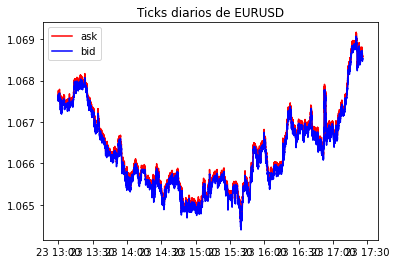

In [49]:
# Gerando o gráfico
plt.plot(ValoresAtivosTicks_PD['time'], ValoresAtivosTicks_PD['ask'], 'r-', label='ask')
plt.plot(ValoresAtivosTicks_PD['time'], ValoresAtivosTicks_PD['bid'], 'b-', label='bid')
 
# exibimos rótulos
plt.legend(loc='upper left')
 
# adicionamos cabeçalho
plt.title('Ticks diarios de ' + simbolo)
 
# mostramos o gráfico
plt.show()